# Derivadas Numéricas

In [27]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

# Primeira Derivada

In [28]:
# Conjunto de funções para calcular derivadas de primeira ordem
from typing import Callable

def forward(func: Callable, h: float = 1e-6) -> Callable:
    """
        Calcula a derivada de `func` usando a diferença progressiva com um passo de `h`.

        ### Retorno
        Devolve uma função `fprime` que recebe como argumento `x` e devolve a derivada de `func` em `x`.
    """

    return lambda x: (func(x + h) - func(x)) / h


def backward(func: Callable, h: float = 1e-6) -> Callable:
    """
        Calcula a derivada de `func` usando a diferença regressiva com um passo de `h`.

        ### Retorno
        Devolve uma função `fprime` que recebe como argumento `x` e devolve a derivada de `func` em `x`.
    """

    return lambda x: (func(x) - func(x-h)) / h


def central(func: Callable, h: float = 1e-4) -> Callable:
    """
        Calcula a derivada de `func` usando a diferença central com um passo de `h`.

        ### Retorno
        Devolve uma função `fprime` que recebe como argumento `x` e devolve a derivada de `func` em `x`.
    """

    return lambda x: (func(x + h/2) - func(x - h/2)) / h

# Segunda Derivada

In [29]:
def central2(func: Callable, h: float = 1e-3) -> Callable:
    """
        Calcula a segunda derivada de `func` usando a diferença central com um passo de `h`.

        ### Retorno
        Devolve uma função `fprime` que recebe como argumento `x` e devolve a segunda derivada de `func` em `x`.
    """

    return lambda x: (func(x + h) - 2 * func(x) + func(x - h)) / (h**2)

# Derivadas Parciais

In [30]:
# Não testado :)
def parcial2(func: Callable, dx: int, dy: int, h: float = 1e-3) -> Callable:
    """
        Calcula derivadas parciais de uma função escalar de duas variáveis `func(x, y)` usando a diferença central com um passo de `h`.
        
        Os argumentos `dx` e `dy` indicam a ordem das derivadas que desejamos, ou seja `dx` indica o número de vezes que derivamos em função segundo `x` e `dy` indica o número de vezes que derivamos em função segundo `y`. Estes números devem ser inteiros não negativos e a sua soma deve ser menor ou igual a 2.

        ### Retorno
        Devolve uma função `fprime` que recebe como argumento `x` e devolve a derivada parcial desejada de `func` em `x`.
    """

    if dx == 0 and dy == 0:
        return func
    
    elif dx == 0 and dy == 1:
        return lambda x, y: (func(x, y + h/2) - func(x, y - h/2)) / h
    
    elif dx == 0 and dy == 2:
        return lambda x, y: (func(x, y + h) - 2 * func(x, y) + func(x, y - h)) / (h**2)
    
    elif dx == 1 and dy == 0:
        return lambda x, y: (func(x + h/2, y) - func(x - h/2, y)) / h
    
    elif dx == 1 and dy == 1:
        return lambda x, y: (func(x + h/2, y + h/2) - func(x + h/2, y - h/2) - func(x - h/2, y + h/2) + func(x - h/2, y - h/2)) / h

    elif dx == 2 and dy == 0:
        return lambda x, y: (func(x + h, y) - 2 * func(x, y) + func(x - h, y)) / (h**2)
    
    else:
        raise ValueError("Derivada não permitida!")

# Testar

Vamos usar a seguinte função para testar os nossos programas:

$$
\begin{align*}
f(x) &= 1 + \frac12\tanh(2x)
\\\\
f'(x) &= \text{sech}^2(2x)
\\\\
f''(x) &= -4\text{sech}^2(2x)\tanh(2x)
\end{align*}
$$

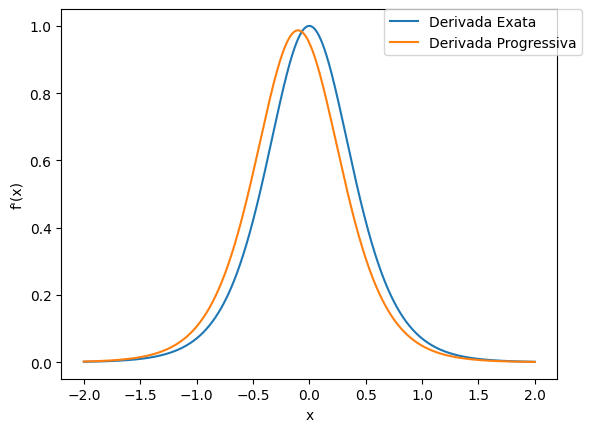

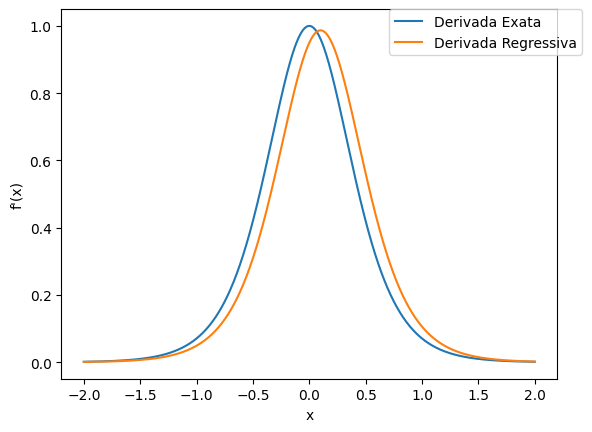

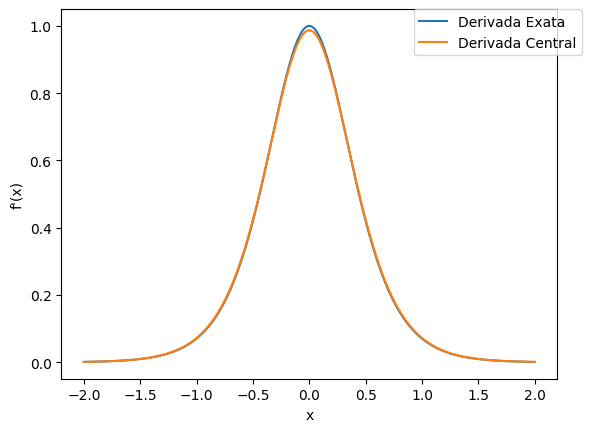

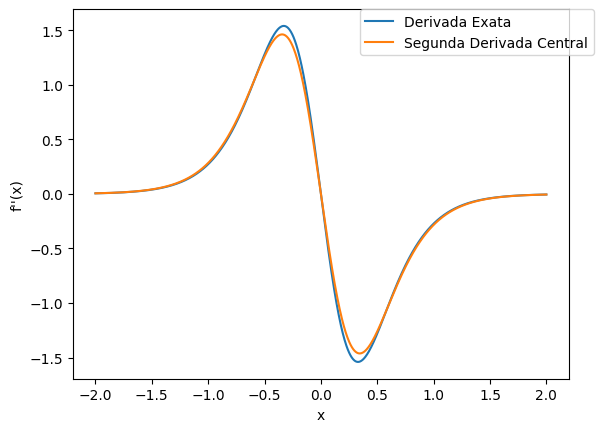

In [31]:
def func(x: (float | np.ndarray)) -> (float | np.ndarray):
    return 1 + np.tanh(2 * x) / 2


def funcprime(x: (float | np.ndarray)) -> (float | np.ndarray):
    return (1 / np.cosh(2 * x))**2


def funcprime2(x: (float | np.ndarray)) -> (float | np.ndarray):
    return -4 * (1 / np.cosh(2 * x))**2 * np.tanh(2 * x)


# Parâmetro
h = 0.2

tt = np.linspace(-2, 2, 1000)
ff1 = funcprime(tt)
ff2 = funcprime2(tt)

fff = forward(func, h)(tt)
ffb = backward(func, h)(tt)
ffc = central(func, h)(tt)
ffcc = central2(func, h)(tt)


plt.plot(tt, ff1, label="Derivada Exata")
plt.plot(tt, fff, label="Derivada Progressiva")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()


plt.plot(tt, ff1, label="Derivada Exata")
plt.plot(tt, ffb, label="Derivada Regressiva")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()


plt.plot(tt, ff1, label="Derivada Exata")
plt.plot(tt, ffc, label="Derivada Central")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()


plt.plot(tt, ff2, label="Derivada Exata")
plt.plot(tt, ffcc, label="Segunda Derivada Central")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.show()